In [12]:
# importo le librerie necessarie per l'analisi e la visualizzazione dei dati
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf 
import seaborn as sns
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [87]:
# importo i dati 
df = pd.read_csv("https://raw.githubusercontent.com/ischirripa1/compitinodatavis/main/data_cleaned_2021.csv")

In [6]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [88]:
#questo è senza modifiche
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [9]:
df= df.drop(['Salary Estimate', 'Job Description', 'Revenue', 'Competitors','Hourly', 'Employer provided', 'seniority_by_title'], axis = 1)

In [69]:
#ho eliminato le colonne che non servivano
df.head()

,index,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree
0,0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,0,0,0,1,1,0,0,0,data scientist,M
1,1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,0,0,data scientist,M
2,2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,0,0,0,data scientist,M
3,3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,0,0,0,data scientist,na
4,4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,0,0,data scientist,na


In [10]:
df.columns

Index(['index', 'Job Title', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'company_txt', 'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel',
       'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim',
       'Degree'],
      dtype='object')

In [86]:
df.dtypes


index                  int64
Job Title             object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Lower Salary           int64
Upper Salary           int64
Avg Salary(K)        float64
company_txt           object
Job Location          object
Age                    int64
Python                 int64
spark                  int64
aws                    int64
excel                  int64
sql                    int64
sas                    int64
keras                  int64
pytorch                int64
scikit                 int64
tensor                 int64
hadoop                 int64
tableau                int64
bi                     int64
flink                  int64
mongo                  int64
google_an              int64
job_title_sim         object
Degree        

ho convertito in migliaia

In [70]:
df['Lower_Salary_k']= df['Lower Salary'] * 1000

In [79]:
df['Upper_Salary_k']= df['Upper Salary'] * 1000

In [84]:
df['Avg_Salary_k']= df['Avg Salary(K)'] * 1000

In [85]:
#questo dovrebbe essere a posto
#la variabile per la mappa è Job Location
df.head()

,index,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tableau,bi,flink,mongo,google_an,job_title_sim,Degree,Lower_Salary_k,Upper_Salary_k,Avg_Salary_k
0,0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,...,1,1,0,0,0,data scientist,M,53000,91000,72000.0
1,1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,...,0,0,0,0,0,data scientist,M,63000,112000,87500.0
2,2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,...,0,0,0,0,0,data scientist,M,80000,90000,85000.0
3,3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,...,0,0,0,0,0,data scientist,na,56000,97000,76500.0
4,4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,data scientist,na,86000,143000,114500.0


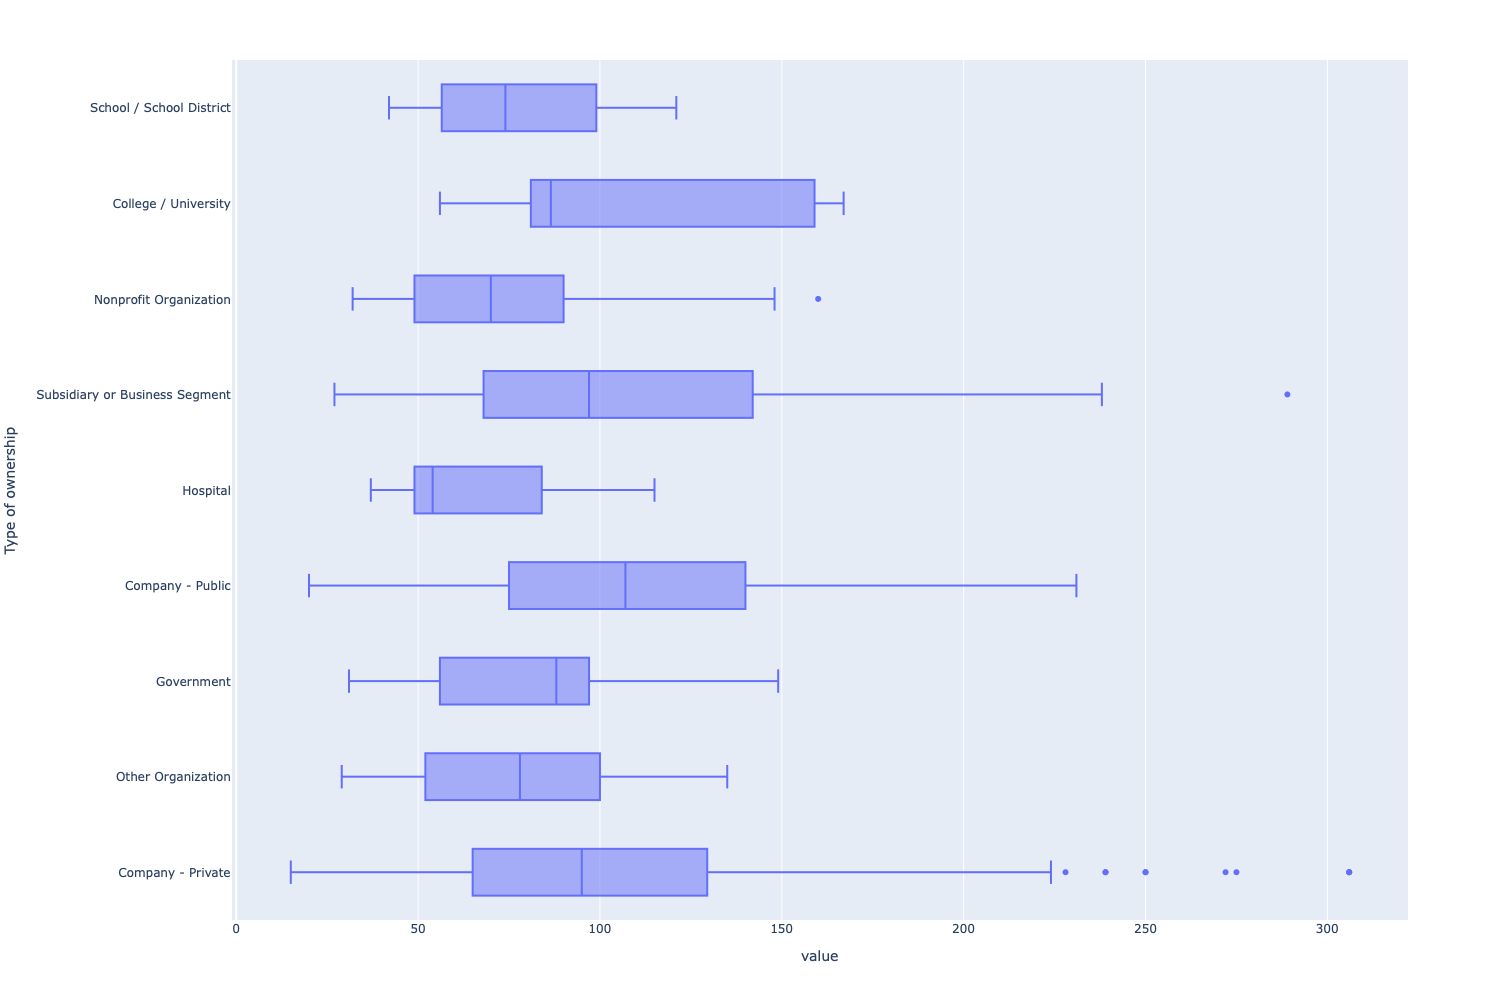

In [34]:
#boxplot esplorativo sugli stipendi in base al tipo di azienda
fig = px.box(df, x=['Lower Salary','Upper Salary'], y="Type of ownership", 
              height= 1000)

fig.show()

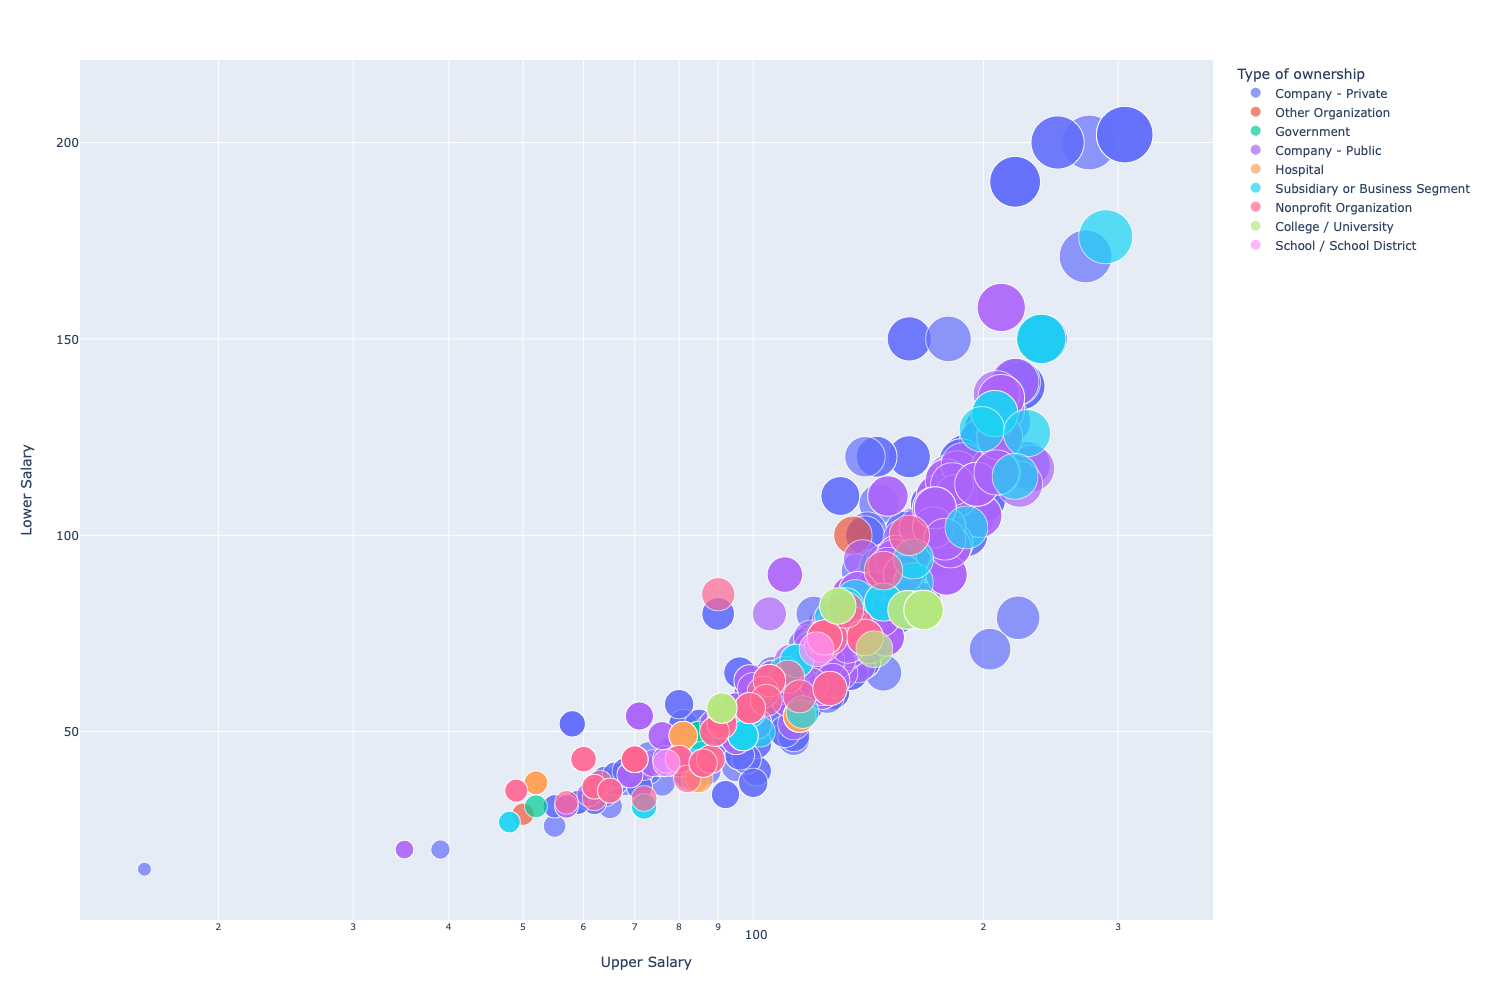

In [54]:
#scatter sul rapporto basso/alto stipendio in base al tipo di azienda
fig = px.scatter(df, x='Upper Salary', y='Lower Salary', size='Avg Salary(K)',
	          color="Type of ownership", hover_name="Job Title", height= 1000, log_x=True, size_max=40)
fig.show()

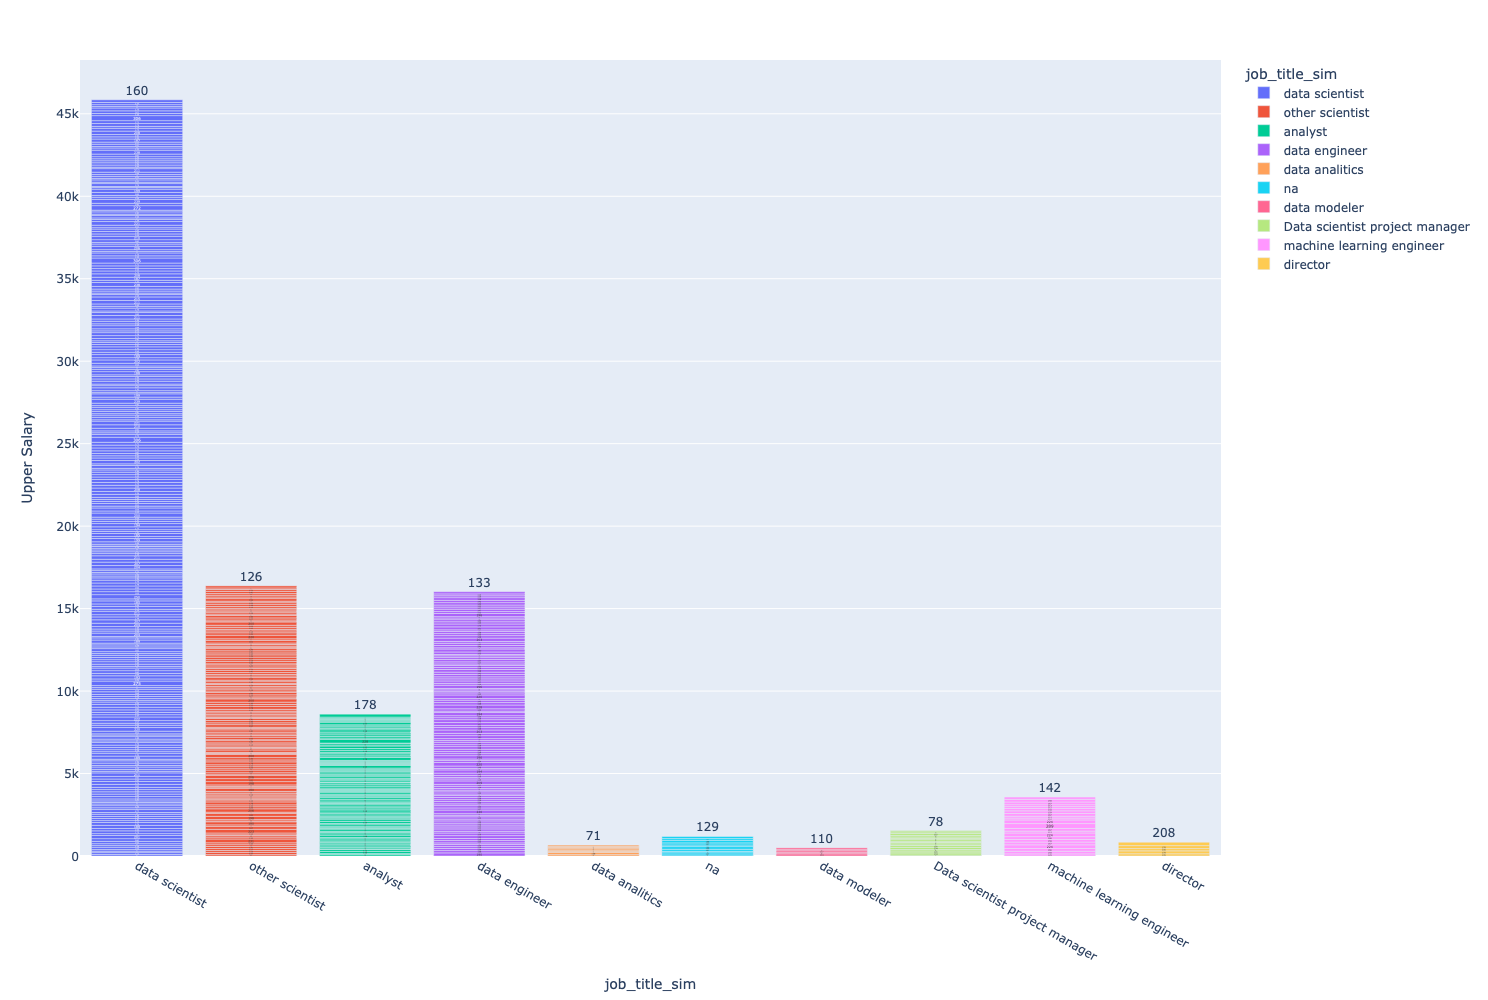

In [68]:
fig = px.bar(df, y='Upper Salary', x='job_title_sim', text='Upper Salary', color='job_title_sim', height=1000)
fig.show()